In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

### Getting the data


In [411]:
salary=pd.read_csv('D:\Salary_Data.csv')

### Cleaning the data


In [412]:
salary.loc[salary### Getting the data
['Education Level']=="Bachelor's Degree",['Education Level']]=["Bachelor's"]
salary.loc[salary['Education Level']=="Master's Degree",['Education Level']]=["Master's"]
salary.loc[salary['Education Level']=='phD',['Education Level']]=['PhD']
salary['Education Level'] = salary['Education Level'].fillna('Unknown')

In [414]:
# 'Unknown' --> NaN
salary.replace('Unknown', np.nan, inplace=True)

# NaN--> X
salary.dropna(inplace=True)
salary['Salary'] = salary['Salary'].astype(int)
salary['Age'] = salary['Age'].astype(int)
salary['Years of Experience'] = salary['Years of Experience'].astype(int)

### Check the data and quick look


In [415]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000
1,28,Female,Master's,Data Analyst,3,65000
2,45,Male,PhD,Senior Manager,15,150000
3,36,Female,Bachelor's,Sales Associate,7,60000
4,52,Male,Master's,Director,20,200000


In [350]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6698 non-null   int32 
 1   Gender               6698 non-null   object
 2   Education Level      6698 non-null   object
 3   Job Title            6698 non-null   object
 4   Years of Experience  6698 non-null   int32 
 5   Salary               6698 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 287.8+ KB


In [351]:
salary.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.094207,115329.253061
std,7.615784,6.061399,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### 1)How does age affect salary level?


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship Between Age and Salary')

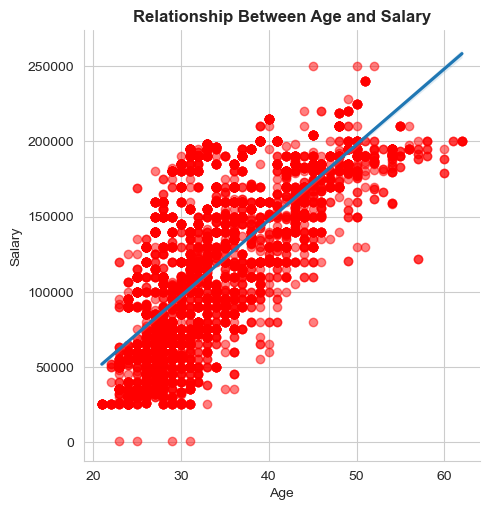

In [433]:
sns.lmplot(data=salary,x='Age',y='Salary',scatter_kws={'alpha':0.5,'color': 'red'})
plt.title('Relationship Between Age and Salary',fontweight='bold')

#### Let's look at the density of salary distribution depending on age


Text(0.5, 1.0, 'Density of Salaries by Age')

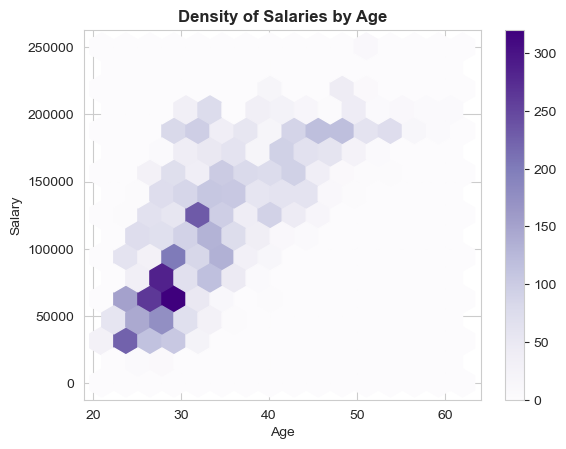

In [434]:
salary.plot(kind='hexbin',x='Age',y='Salary',gridsize=15,colormap='Purples')
plt.title('Density of Salaries by Age',fontweight='bold')

### ✅ RESULT Salary grows directly when a person* gets older

*The person is from our dataset
# --------------------------------------------------------------------------------------------------

### How does education level affect salary?
#### let's look at the unique value of the education column



In [320]:
salary['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

<Axes: title={'center': 'Distribution of Salaries by Education Level (violinplot)'}, xlabel='Education Level', ylabel='Salary'>

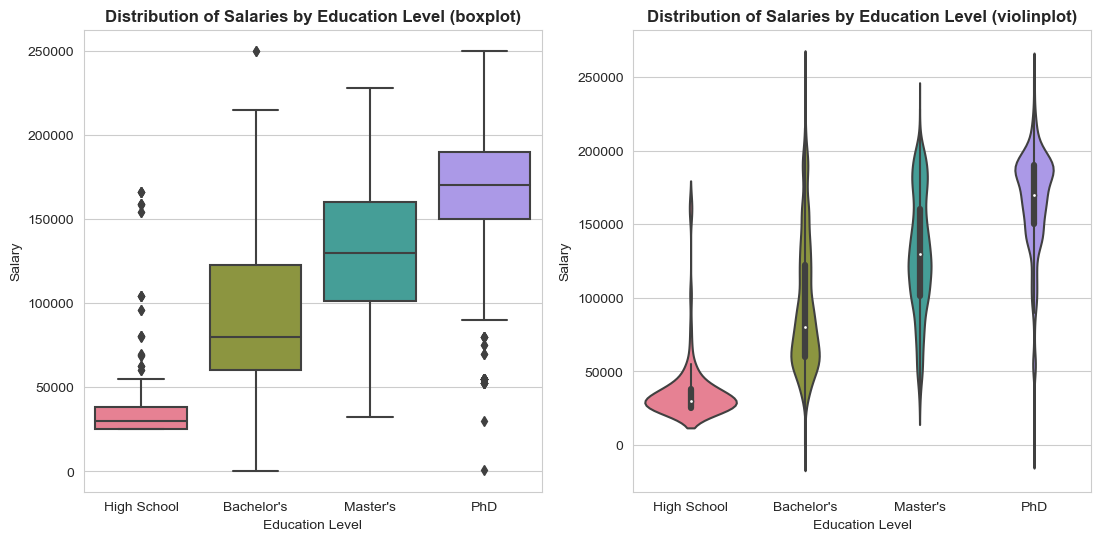

In [450]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
our_order = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']
plt.title('Distribution of Salaries by Education Level (boxplot)',fontweight='bold')
sns.boxplot(data=salary,y='Salary',x='Education Level',palette='husl',order=our_order)

plt.subplot(1,2,2)
our_order = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']
plt.title('Distribution of Salaries by Education Level (violinplot)',fontweight='bold')
sns.violinplot(data=salary,y='Salary',x='Education Level',palette='husl',order=our_order)

### ✅ The higher the level of education of a person, the higher his average salary (in general, the distribution is higher)
# --------------------------------------------------------------------------------------------------

### Is there a salary difference between men and women?
#### Let's do the t test



In [417]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000
1,28,Female,Master's,Data Analyst,3,65000
2,45,Male,PhD,Senior Manager,15,150000
3,36,Female,Bachelor's,Sales Associate,7,60000
4,52,Male,Master's,Director,20,200000


In [420]:
H0='The average salary of men is less than or equal to that of women'
H1='The average salary of men is greater than that of women'
res=sp.stats.ttest_ind(salary[salary['Gender']=='Male'].Salary,salary[salary['Gender']=='Female'].Salary, equal_var=False, alternative='greater')
alpha=0.05
if res.pvalue<=alpha:
    print(H1)
else:
    print(H0)

The average salary of men is greater than that of women


In [426]:
group=salary.groupby('Gender').agg({'Salary':'mean'}).reset_index()
group=group.rename(columns={'Salary':'AVG salary'})
group=group.loc[group.Gender!='Other']
group

,Gender,AVG salary
0,Female,107888.998672
1,Male,121395.697630


Text(0.5, 1.0, 'Distribution of Average Salary by Gender')

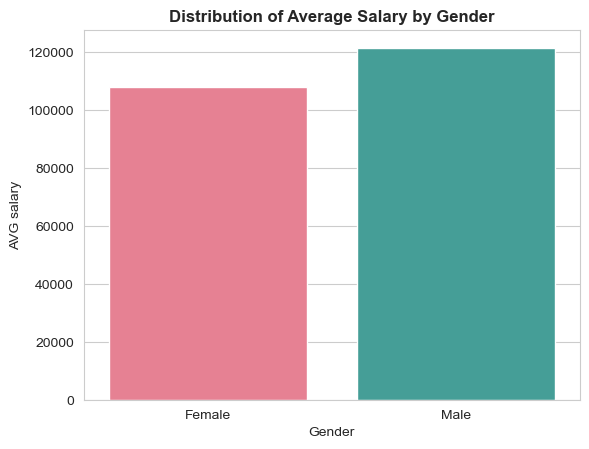

In [428]:
sns.barplot(data=group,x='Gender',y='AVG salary',palette='husl')
plt.title('Distribution of Average Salary by Gender',fontweight='bold')

### ✅ RESULT We conducted testing using the t-test and determined that, on average, a man's salary is higher than a woman's, which is statistically proven
#### We took 5% as the alpha significance level, which means that the probability of our error during testing is exactly 5%
# --------------------------------------------------------------------------------------------------

### How does work experience affect salary level?
#### let's look at the unique values




In [377]:
salary['Years of Experience'].unique()

array([ 5,  3, 15,  7, 20,  2, 12,  4,  1, 10, 18,  6, 14, 16,  0, 22, 19,
        9, 13, 11, 25, 21,  8, 17, 23, 24, 31, 30, 28, 33, 27, 34, 29, 26,
       32])

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Salary dependence on age')

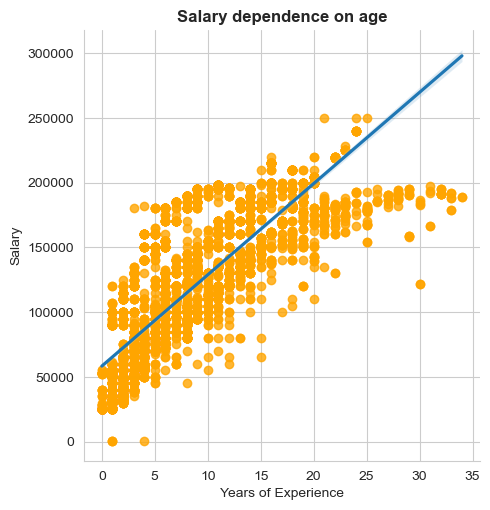

In [431]:
sns.lmplot(data=salary,x='Years of Experience',y='Salary',scatter_kws={'color':'orange'})
plt.title('Salary dependence on age',fontweight='bold')

### ✅ RESULT We realized that the more work experience, the higher the salary
# --------------------------------------------------------------------------------------------------

### Which jobs are associated with the highest and lowest salaries?






In [328]:
group=salary.groupby('Job Title').agg({'Salary':'mean'})
group=group.rename(columns={'Salary':'AVG Salary'})
group=group.sort_values(by='AVG Salary',ascending=False).reset_index()
group

,Job Title,AVG Salary
0,Chief Technology Officer,250000.000000
1,CEO,250000.000000
2,Chief Data Officer,220000.000000
3,Director of Data Science,204561.403509
4,VP of Finance,200000.000000
...,...,...
186,Juniour HR Coordinator,32000.000000
187,Junior Sales Associate,28211.267606
188,Delivery Driver,28000.000000
189,Receptionist,25000.000000


#### top 5 high and top 5 low salaries

In [329]:
max_avg=group.head()
min_avg=group.tail()

Text(0.5, 1.0, 'MIN salaries')

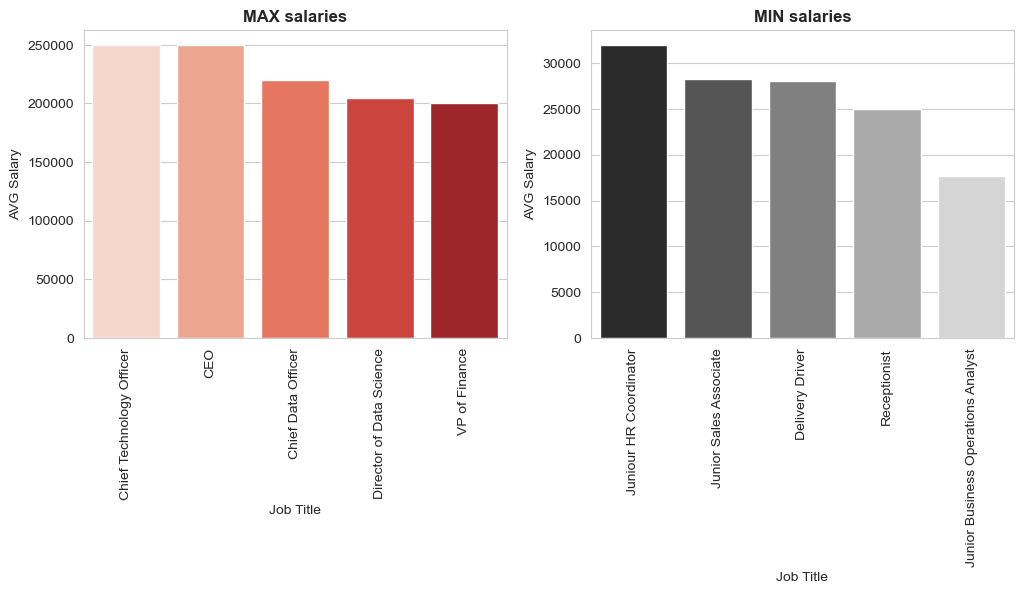

In [435]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=max_avg,x='Job Title',y='AVG Salary',palette='Reds')
plt.xticks(rotation=90)
plt.title('MAX salaries',fontweight='bold')
plt.subplot(1,2,2)
sns.barplot(data=min_avg,x='Job Title',y='AVG Salary',palette='gray')
plt.xticks(rotation=90)
plt.title('MIN salaries',fontweight='bold')

### ✅ RESULT We understood which professions have the highest salaries and which have the lowest
#### namely, we analyzed the top 5 high and low salaries
# --------------------------------------------------------------------------------------------------

### Which age range has the highest salary?







Text(0.5, 1.0, 'Salary Trend Across Age Groups')

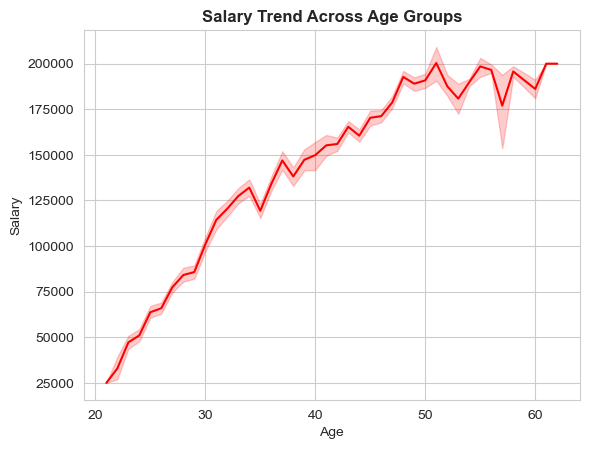

In [436]:
sns.set_style("whitegrid")
sns.lineplot(data=salary,x='Age',y='Salary',color='red')
plt.title("Salary Trend Across Age Groups",fontweight='bold')


In [452]:
our_bins = [21, 35, 45, 65]
labels = ['Youth', 'Adults', 'Middle Age']
salary['Age group']=pd.cut(salary['Age'],bins=our_bins,labels=labels)
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age group
0,32,Male,Bachelor's,Software Engineer,5,90000,Youth
1,28,Female,Master's,Data Analyst,3,65000,Youth
2,45,Male,PhD,Senior Manager,15,150000,Adults
3,36,Female,Bachelor's,Sales Associate,7,60000,Adults
4,52,Male,Master's,Director,20,200000,Middle Age


Text(0.5, 1.0, 'Average Salary by Age Group')

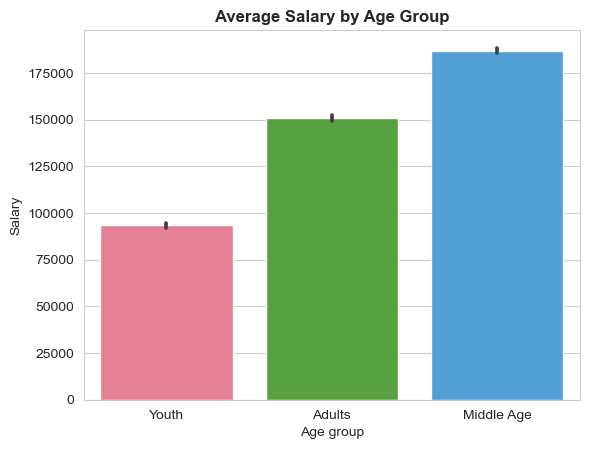

In [438]:
sns.barplot(data=salary,x='Age group',y='Salary',palette='husl')
plt.title("Average Salary by Age Group",fontweight='bold')

### ✅RESULT We again looked at the dependence of age on salary and additionally built a bar chart in which we divided our people into groups and looked at what the average salary is for each group
# --------------------------------------------------------------------------------------------------

### How does work experience affect salary by job title?








In [388]:
group=salary.groupby(['Job Title','Years of Experience']).agg({'Salary':'mean'})
group=group.rename(columns={'Salary':'AVG Salary'})
group=group.sort_values(by='AVG Salary',ascending=False).reset_index()
group

,Job Title,Years of Experience,AVG Salary
0,Financial Manager,21,250000.000000
1,Chief Technology Officer,24,250000.000000
2,CEO,25,250000.000000
3,Data Scientist,24,240000.000000
4,Marketing Manager,23,228000.000000
...,...,...,...
731,Junior Sales Associate,1,26735.849057
732,Junior Sales Representative,0,25000.000000
733,Receptionist,0,25000.000000
734,Sales Associate,0,25000.000000


#### Let's take the 3 most common professions

In [391]:
a=group['Job Title'].value_counts().reset_index().head(3)
list_popular_job=a['Job Title'].tolist()
popular_job=group[group['Job Title'].isin(list_popular_job)]

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Experience vs. Salary: Trends by Job Title')

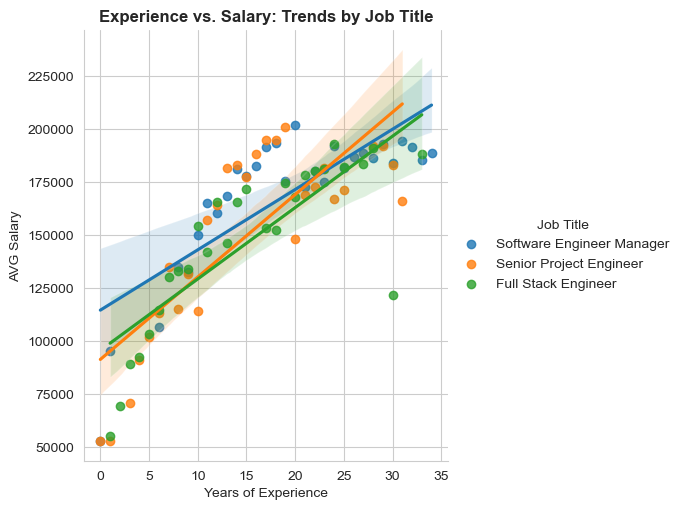

In [439]:

sns.lmplot(data=popular_job,x='Years of Experience',y='AVG Salary',hue='Job Title')
plt.title("Experience vs. Salary: Trends by Job Title",fontweight='bold')


### ✅RESULT We again looked at the dependence of salary on work experience, but did this only for the top 3 popular jobs (the most common) and also built a regression line to take a closer look at this dependence for each of the three professions.
# --------------------------------------------------------------------------------------------------

### What are the differences in salaries between different age groups and education levels?

In [337]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age group
0,32,Male,Bachelor's,Software Engineer,5,90000,Молодежь
1,28,Female,Master's,Data Analyst,3,65000,Молодежь
2,45,Male,PhD,Senior Manager,15,150000,Взрослые
3,36,Female,Bachelor's,Sales Associate,7,60000,Взрослые
4,52,Male,Master's,Director,20,200000,Средний возраст


In [454]:
pivot=salary.pivot_table(values='Salary',columns='Age group',index='Education Level',aggfunc='mean',dropna=True)

pivot

Age group,Youth,Adults,Middle Age
Education Level,,,
Bachelor's,87519.740355,136552.452830,167816.206897
High School,34254.707143,165919.000000,159473.000000
Master's,114236.917582,147676.486862,179463.008264
PhD,138847.247449,164054.945355,192248.971963


Text(0.5, 1.0, 'Heatmap of Metrics by Category')

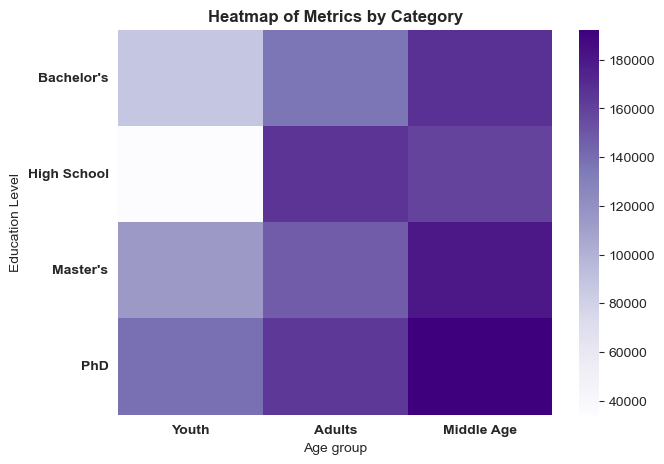

In [455]:
plt.figure(figsize=(7,5))
sns.heatmap(pivot,cmap='Purples')
plt.yticks(rotation=0,fontweight='bold') 
plt.xticks(fontweight='bold') 
plt.title('Heatmap of Metrics by Category',fontweight='bold')

### ✅RESULT We have built a heat map that shows the distribution of salaries depending on age group and education
# --------------------------------------------------------------------------------------------------

# ✅✅✅
# In general, we conducted a comprehensive analysis of the dataset:
## -An analytical answer was found for each research question
## -Diagrams were built for better visualization of the answer to the task
## -Also, a more thorough regression analysis should have been conducted, which would 
## have told us the nature of the dependence and, therefore, the result could have been better
